# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
# empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 607: Hermanus
Processing Record 2 of 607: Kavieng
Processing Record 3 of 607: Benghazi
Processing Record 4 of 607: Gejiu
Processing Record 5 of 607: Khatanga
Processing Record 6 of 607: Jamestown
City not found. Skipping...
Processing Record 8 of 607: Bluff
Processing Record 9 of 607: Laguna Beach
Processing Record 10 of 607: Caiapônia
Processing Record 11 of 607: Kapaa
Processing Record 12 of 607: Ushuaia
Processing Record 13 of 607: Comodoro Rivadavia
Processing Record 14 of 607: Jinchang
Processing Record 15 of 607: Mahon
Processing Record 16 of 607: Avarua
Processing Record 17 of 607: Laas
City not found. Skipping...
Processing Record 19 of 607: Butaritari
Processing Record 20 of 607: Alofi
Processing Record 21 of 607: Bāsār
Processing Record 22 of 607: San Rafael
Processing Record 23 of 607: Timizart
Processing Record 24 of 607: New Norfolk
Processing Record 25 of 607: Itarema
Processing Record 26 of 607

Processing Record 215 of 607: Igrim
Processing Record 216 of 607: Tazovsky
Processing Record 217 of 607: Funtua
Processing Record 218 of 607: Cascais
Processing Record 219 of 607: Tegul'det
City not found. Skipping...
Processing Record 221 of 607: Río Gallegos
City not found. Skipping...
Processing Record 223 of 607: Kruisfontein
Processing Record 224 of 607: Santoña
Processing Record 225 of 607: Marzuq
Processing Record 226 of 607: Saskylakh
Processing Record 227 of 607: Morehead
Processing Record 228 of 607: Longyan
Processing Record 229 of 607: Nísia Floresta
Processing Record 230 of 607: Nouadhibou
Processing Record 231 of 607: Asău
Processing Record 232 of 607: Staunton
Processing Record 233 of 607: Portsmouth
Processing Record 234 of 607: Karachi
Processing Record 235 of 607: Arrondissement de Lure
Processing Record 236 of 607: Havelian
Processing Record 237 of 607: Bredasdorp
Processing Record 238 of 607: Baruun-Urt
Processing Record 239 of 607: Katsuura
Processing Record 240 of

Processing Record 428 of 607: Gizo Government Station
Processing Record 429 of 607: Muros
Processing Record 430 of 607: Yaan
Processing Record 431 of 607: Rovaniemi
Processing Record 432 of 607: Jaraguá do Sul
Processing Record 433 of 607: Neiafu
Processing Record 434 of 607: Marsaxlokk
City not found. Skipping...
City not found. Skipping...
Processing Record 437 of 607: Shadrinsk
Processing Record 438 of 607: Mount Gambier
Processing Record 439 of 607: Aykhal
Processing Record 440 of 607: Bengkulu
Processing Record 441 of 607: Usinsk
Processing Record 442 of 607: Addanki
Processing Record 443 of 607: Agüimes
Processing Record 444 of 607: Edd
City not found. Skipping...
Processing Record 446 of 607: Chu
Processing Record 447 of 607: Catabola
Processing Record 448 of 607: Catalão
Processing Record 449 of 607: Bubaque
Processing Record 450 of 607: Sangmélima
Processing Record 451 of 607: Deputatsky
Processing Record 452 of 607: Bom Jardim
Processing Record 453 of 607: Raja
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
# read csv file
weather_df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

In [59]:
#display the table
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Hermanus,ZA,1612978752,-34.4187,19.2345,0,71,73.99,4.00
1,Kavieng,PG,1612978752,-2.5744,150.7967,53,75,82.60,8.93
2,Benghazi,LY,1612978753,32.1167,20.0667,0,48,64.71,9.35
3,Gejiu,CN,1612978753,23.3060,103.1635,0,99,39.51,2.01
4,Khatanga,RU,1612978753,71.9667,102.5000,58,84,-15.54,5.99


In [60]:
#convert table to csv
weather_df.to_csv("../output_data/citiestable.csv", encoding='utf-8', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
hot_places = weather_df.loc[weather_df['Humidity'] > 100]
hot_places

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed


In [62]:
#  Get the indices of cities that have humidity over 100%.
#N/A

In [63]:
# to convert timestamp to regular date
from datetime import datetime

converted_date = []

for dt in date:
    converted_date.append(datetime.fromtimestamp(dt))
    

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame({
    "City": city,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": converted_date,
})

In [64]:
clean_city_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,73.99,71,0,4.00,ZA,2021-02-10 10:39:12
1,Kavieng,-2.5744,150.7967,82.60,75,53,8.93,PG,2021-02-10 10:39:12
2,Benghazi,32.1167,20.0667,64.71,48,0,9.35,LY,2021-02-10 10:39:13
3,Gejiu,23.3060,103.1635,39.51,99,0,2.01,CN,2021-02-10 10:39:13
4,Khatanga,71.9667,102.5000,-15.54,84,58,5.99,RU,2021-02-10 10:39:13


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

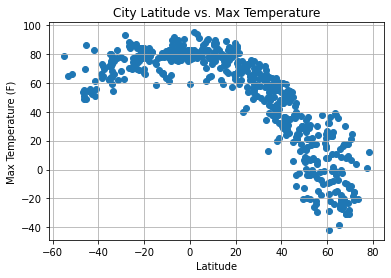

In [81]:
# create scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temperature"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/MaxTemp.png")

Reviewing the data set provided, we can see cluster trends relative to maximum tempature that is impacted by a city's geographical location either further or nearer to the equator. Cities that settle closer to the equator most often experience trends of higher tempatures. What is most interesting is the standard of "high tempatures" really spread across a diversified set. The sharp decline is also compelling to review; rather than a mediated slope, the change is rather sharp. It makes me wonder about the stark contrast and how historical weather data from the past may compare - is it as intense a drop as the location changes? Has environmental changes created more regular trends of high tempatures in these areas? For now - the temps continue to rise!

## Latitude vs. Humidity Plot

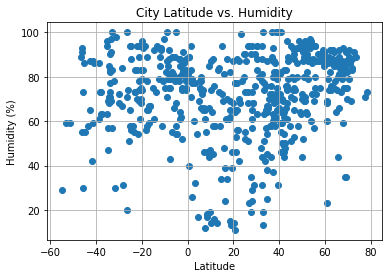

In [82]:
# create scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Humidity.png")

Further investigating the data set, we can also see that humidity is interestingly impacted as the georgraphical locations change. When looking into the visual we see that both areas near and far from the equators are experiencing a fair amount of humidity. This is concerning, as colder climates are expected to emmit -less- humidity. Levels of 100% humidity can be extremely dangerous for human inhalation. It also shows us that these areas are also holding onto warmer weather, which in turn relates to the commanality of high humidity rates. Moving forward important questions to have would be again reviewing furhter histrorical data to see the changes through past to now. Reviewing specific variables in these chosen cities to see what else could be raising the humidity levels.

## Latitude vs. Cloudiness Plot

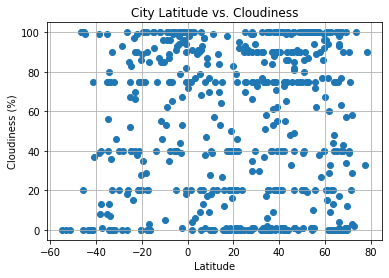

In [83]:
# create scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Cloudiness.png")

It is not a serious question of science weather or not most all areas experience some sort of "cloudiness". This is because most all places will experience some sort of storm, or passing by of clouds in general. When reviewing the data on a graph, you can see that this idea is supported as the cities are spread across the grid lines. What else can be see is that areas closer towards the equator do see "cloudiness" less often then cities further. This also makes sense as the equator faces closer to the sun's rays. Some further review would be the cities that experience extremely high frequency levels of "cloudiness" both extremely closer to the eqautor and not; as well as those that experience absolutely no cloudiness. 

## Latitude vs. Wind Speed Plot

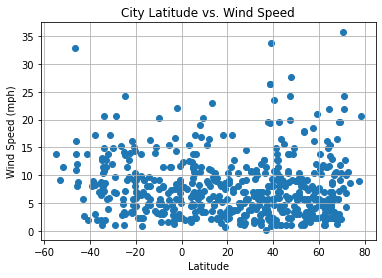

In [84]:
# create scatter plot
plt.scatter(df["Latitude"], df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/WindSpeed.png")

When plotting this data set, it sets an interesting obvious visual - latitude doesn't impact wind speed; but shouldn't it? Even in a randomized sample, most cities experience little to no winds. That seems odd. So I researched the impact of wind speed on environment and found this article here (https://www.scientificamerican.com/article/climate-change-may-mean-slower-winds/)

In summary they also have seen changes or drops in wind speeds. Wind is most often utilized as a resource for natural energy, so the idea that we are seeing less of it can be troubling. Wind speeds usually need to be 25mph+ to power a wind turbine. When reading the article it was said that impacts such as "fast growing urban areas" can effect wind patterns. Based on the other measures we have reviewed thus far, we can see that human presence is in turn vastly effect different assests of our natural environment. This hit relays to our weather as we continue to see dangerous changes aspects of tempatures, cloudiness, and humidity. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression